In [29]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import random

from trading_session_gym.envs.trading_session_gym import TradingSession

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
env = TradingSession()
env.reset()
done = False
proability_of_zero = 0.90

rewards = np.array(env.get_reward())
prices = np.array(env.get_prices())
holdings_quantity = np.array(env.get_holdings_quantity())
sessions_completed = np.array(env.get_sessions_completed())

while done == False:
    action = env.action_space.sample()
    action = np.where(np.random.random(action.shape) < proability_of_zero, 0, action)
    obs, reward, done, _ = env.step(action)
    
    rewards = np.append(rewards, reward)
    prices = np.vstack([prices, obs['session_prices']])
    holdings_quantity = np.vstack([holdings_quantity, obs['holdings_quantity']])
    sessions_completed = np.append(sessions_completed, env.get_sessions_completed())

C:\123\thesis\trading-session-gym\trading_session_gym\envs\trading_session_gym.py:149: RuntimeWarning: invalid value encountered in true_divide
  
C:\123\thesis\trading-session-gym\trading_session_gym\envs\trading_session_gym.py:149: RuntimeWarning: divide by zero encountered in true_divide
  


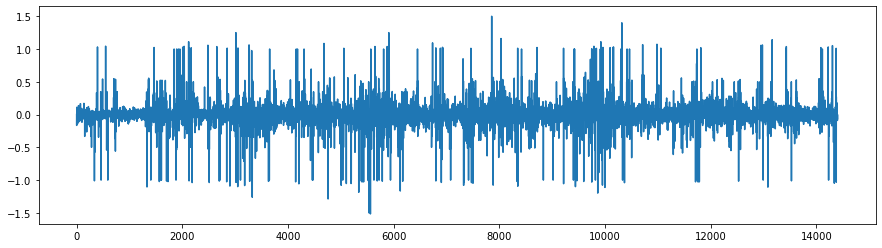

In [31]:
fig = plt.figure(figsize = [15,4])
plt.plot(rewards)

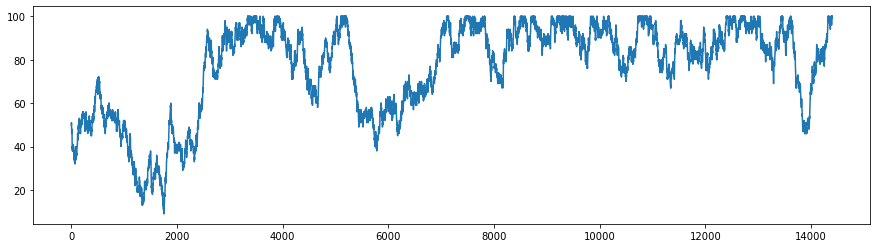

In [32]:
fig = plt.figure(figsize = [15,4])
plt.plot(prices[:,1])

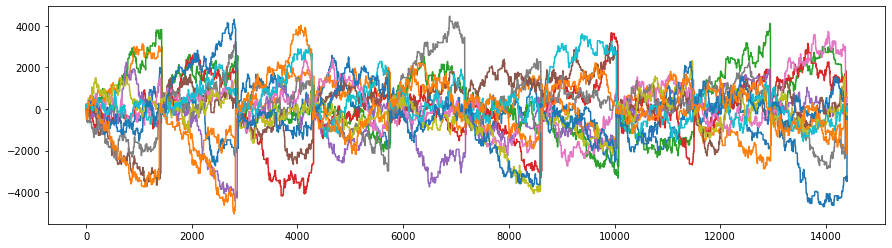

In [33]:
fig = plt.figure(figsize = [15,4])
#plt.plot(prices[:,5])
plt.plot(holdings_quantity[:,:])

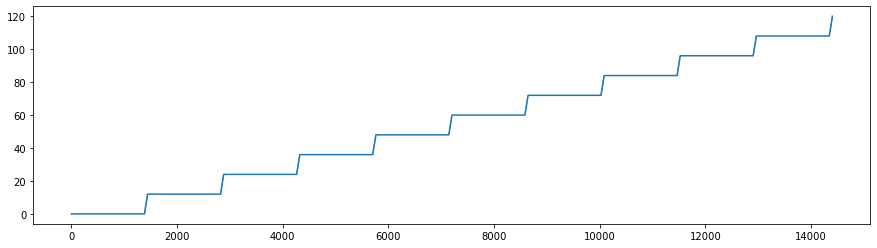

In [34]:
fig = plt.figure(figsize = [15,4])
plt.plot(sessions_completed)

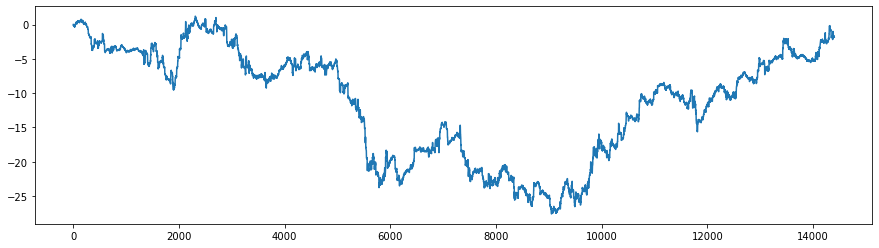

In [35]:
rewards_accu = np.add.accumulate(rewards)
fig = plt.figure(figsize = [15,4])
plt.plot(rewards_accu)